# Excercise 04: Factor Analysis

## 1 Checking EDA and the Factor Analysis Appropriateness

In [2]:
import pandas as pd
data_satisfaction = pd.read_csv("../Data/satisfaction.csv")
data_satisfaction.head(10)

,AtWork1,AtWork2,AtWork3,Hobby1,Hobby2,AtHome1,AtHome2,AtHome3,General1,General2
0,105.126,101.659,115.060,100.998,95.184,100.281,101.667,85.553,104.035,110.278
1,77.049,72.933,77.485,72.744,61.563,93.854,95.392,88.609,70.115,72.000
2,86.017,82.206,78.889,77.951,91.705,86.773,108.070,93.348,86.021,70.688
3,91.425,106.107,95.640,90.901,111.466,100.248,86.080,93.822,101.224,82.665
4,113.714,92.029,99.079,79.277,98.416,104.013,83.271,69.621,82.820,70.022
5,86.606,87.817,67.663,93.662,77.997,99.822,97.275,108.622,91.400,79.776
6,95.067,94.505,98.081,94.513,97.422,93.694,99.181,96.398,90.732,86.707
7,113.500,104.607,105.572,101.008,102.275,87.427,96.664,86.577,93.057,112.702
8,104.549,97.299,94.074,88.538,98.112,97.785,99.585,99.761,99.399,105.908
9,104.635,97.908,85.823,82.486,90.447,104.688,95.076,99.695,77.630,62.031


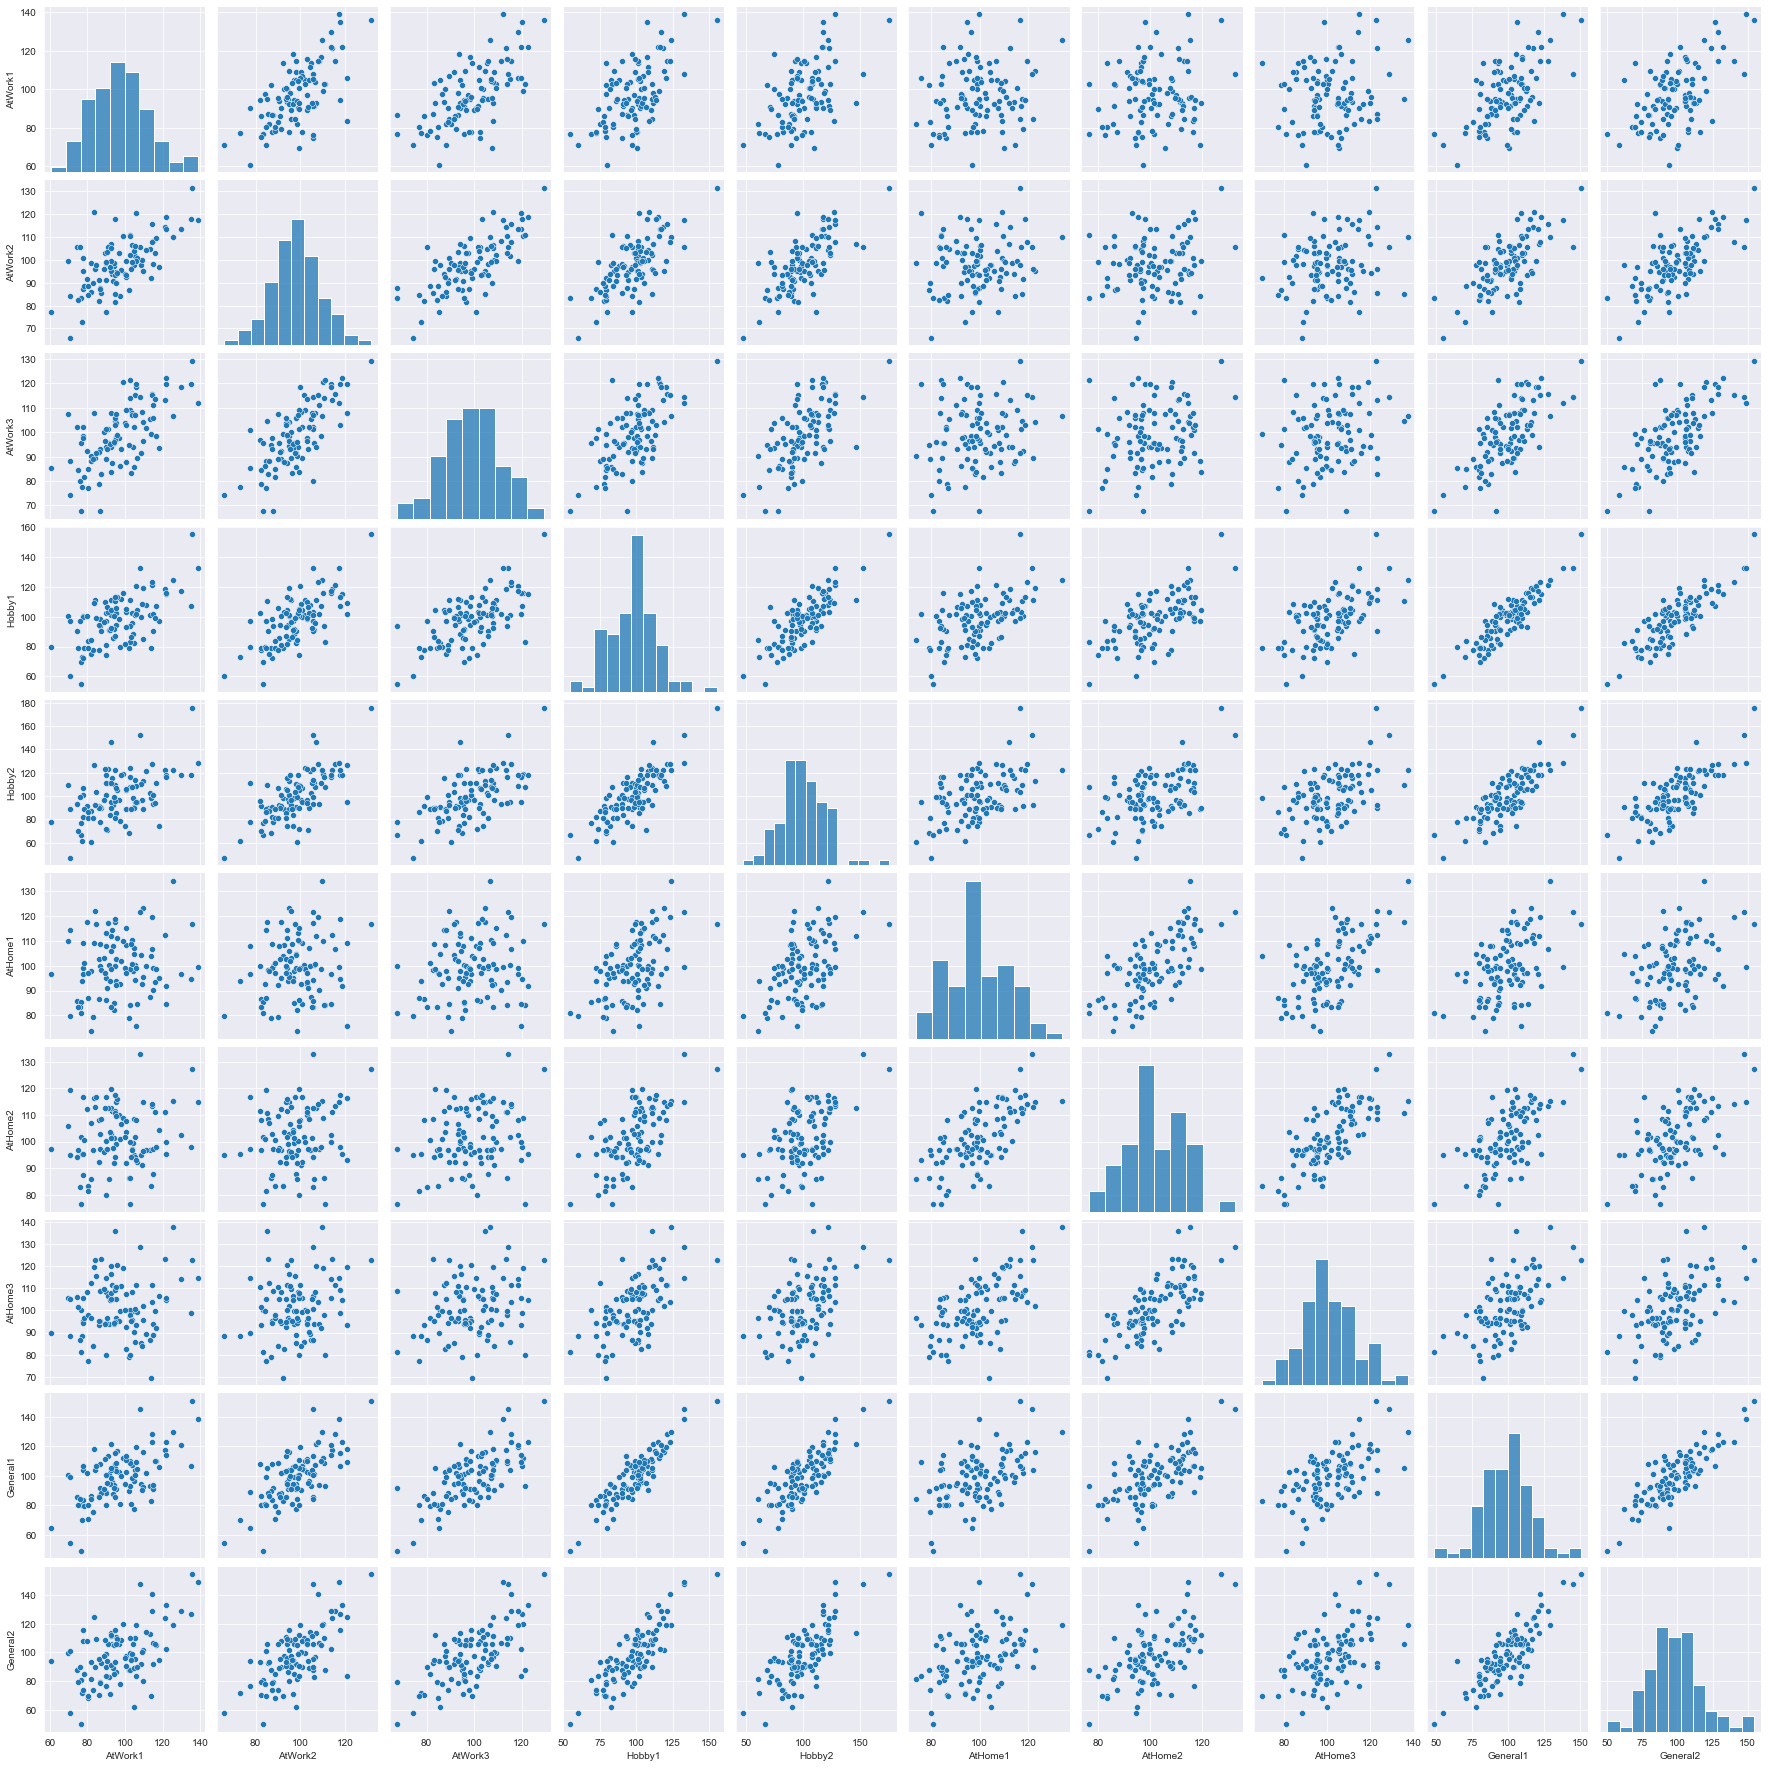

In [3]:
import seaborn as sns
sns.pairplot(data_satisfaction)

<AxesSubplot:>

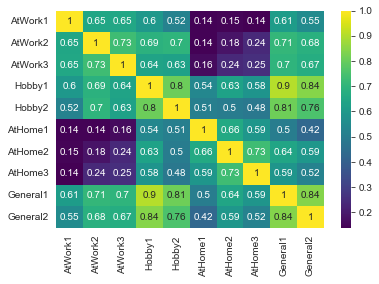

In [4]:
sns.heatmap(data_satisfaction.corr(), cmap="viridis", annot=True)

In [5]:
from sklearn.preprocessing import StandardScaler
data_std = pd.DataFrame(StandardScaler().fit_transform(data_satisfaction), columns = data_satisfaction.columns)
data_std

,AtWork1,AtWork2,AtWork3,Hobby1,Hobby2,AtHome1,AtHome2,AtHome3,General1,General2
0,0.524275,0.311313,1.297376,0.187476,-0.248176,0.064833,0.005826,-1.248426,0.288584,0.633907
1,-1.293822,-2.250991,-1.727311,-1.594338,-1.942689,-0.474431,-0.564310,-1.007245,-1.720604,-1.379061
2,-0.713109,-1.423857,-1.614293,-1.265963,-0.423519,-1.068570,0.587591,-0.633241,-0.778442,-1.448057
3,-0.362919,0.708066,-0.265882,-0.449283,0.572444,0.062064,-1.410382,-0.595833,0.122079,-0.818209
4,1.080382,-0.547665,0.010948,-1.182340,-0.085282,0.377971,-1.665603,-2.505786,-0.968047,-1.483080
...,...,...,...,...,...,...,...,...,...,...
95,-0.156160,1.756946,0.339056,0.966002,1.115610,1.601405,1.439660,0.606441,0.944532,0.913938
96,-0.794245,-0.046015,-0.608801,0.088654,0.164805,1.435019,1.392868,1.111295,0.420851,0.586945
97,2.709721,1.717788,1.065947,2.194618,1.411007,0.002491,1.189345,1.046028,2.321228,2.671906
98,-0.107465,-0.743365,0.683101,0.480535,0.335310,-0.603227,0.736326,0.725927,0.549980,0.390897


## 3 PCA

In [6]:
from sklearn.decomposition import PCA
pca_satisfaction = PCA(.75).fit(data_std)

In [7]:
pca_df = pd.DataFrame(pca_satisfaction.fit_transform(data_std),
                      columns = [f"pc_{i+1}" for i in range(pca_satisfaction.components_.shape[0])])
pca_df

,pc_1,pc_2
0,0.642869,1.272303
1,-4.534313,-1.124683
2,-2.822558,-0.921151
3,-0.701307,0.909078
4,-2.285649,1.837131
...,...,...
95,2.978300,-0.871453
96,1.060889,-2.262004
97,5.357021,1.176135
98,0.853188,-0.435750


## 4 Factor Analysis

In [8]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation='varimax')

In [9]:
fa.fit(data_std)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [10]:
print(1)

1


In [ ]:
fa_df = pd.DataFrame(fa.loadings_)
fa_df

In [ ]:
fa_df = pd.DataFrame(fa.loadings_, columns=[f"fc_{i+1}" for i in range(2)])
fa_df = fa_df.set_index(data_std.columns)
fa_df

In [ ]:
sns.scatterplot(x = fa_df['fc_1'], y=fa_df['fc_2'], hue = fa_df.index.get_level_values(level=0))

In [ ]:
rotator = fan.Rotator()
rot_fa_df = pd.DataFrame(rotator.fit_transform(fa_df), columns=[f"rot_fc_{i+1}" for i in range(2)]).set_index(data_std.columns)
rot_fa_df

In [ ]:
sns.scatterplot(x=rot_fa_df['rot_fc_1'], y=rot_fa_df['rot_fc_2'], hue = fa_df.index.get_level_values(level=0))

In [ ]:
rotator.fit_transform(data_std).shape